<a href="https://colab.research.google.com/github/hs0224/a-professor-student-research-club/blob/main/private/Mr_Mink/Chap01_Fileds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.7 다양한 분야에서의 딥러닝
## fastai로 세그멘테이션 모델을 학습시키는 방법

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.CAMVID_TINY) # 데이터셋 주소
dls = SegmentationDataLoaders.from_label_func( # 세그멘테이션 데이터 로더
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
    # 주소/code.txt 파일 내에서 str을 읽어옴. -> 해당 txt가 코드임.                                              
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.985148,2.086898,01:16


epoch,train_loss,valid_loss,time
0,1.755190,1.500802,01:21
1,1.543651,1.598481,01:22
2,1.417489,1.144914,01:22
3,1.289261,0.867184,01:20
4,1.151892,0.759075,01:18
5,1.038372,0.719373,01:18
6,0.945369,0.689501,01:17
7,0.870601,0.682192,01:18


### UserWarning:
##### * The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
##### ** f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
##### *** `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15.
##### **** The current behavior is `weights=ResNet34_Weights.IMAGENET1K_V1` or `weights=ResNet34_Weights.DEFAULT`

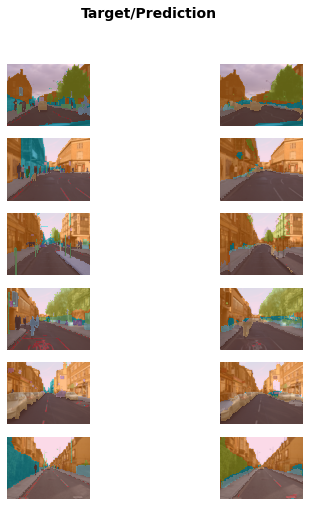

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

## fastai로 자연어 처리(NLP) 모델을 학습시키는 방법

In [1]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics = accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.456810,0.410563,0.809040,03:14


epoch,train_loss,valid_loss,accuracy,time
0,0.306920,0.274340,0.887960,06:52
1,0.245580,0.200460,0.923160,06:55
2,0.201759,0.197339,0.925960,06:54
3,0.142913,0.210339,0.924640,06:55


#### dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
##### * valid(validation set): 용도 설정 옵션. '테스트용' 임을 명시
#### learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics = accuracy)
##### * 모델은 AWD_LSTM
##### ** drop_mult: 드랍아웃?
##### *** metrics: 평가지표
#### learn.fine_tune(4, 1e-2)
##### * 4: 모델 입장에서는 교체된 말단 레이어에 대한 epoch & update
##### ** 1e-2: 교체된 말단 레이어의 update에 대한 learning_rate 설정

In [2]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([3.9939e-04, 9.9960e-01]))

## fastai 메소드에 관해 궁금한 점이 있다면? Use "doc()".

In [3]:
doc(learn.predict)

Learner.predict(item, rm_type_tfms=None, with_input=False)
Prediction on `item`, fully decoded, loss function decoded and probabilities

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


## fastai로 테이블형 데이터로 모델 구축 방법
##### * tabletype: spread_sheet, DB, CSV files.
##### ** 테이블형 데이터는 상업적인 면에서 훨씬 유용하다.

In [7]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(
    path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education',
                 #'martial-status' 은 Key-Error 가 생겨서 뺐음.
                'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize]
  )

learn = tabular_learner(dls, metrics=accuracy)

#### 이 작업에는 사용할 수 있는 사전 학습된 모델이 없다!
##### * 보통 사전 학습된 테이블형 모델을 접할 기회가 거의 없기 때문이다.
#### 따라서, fine_tune() 가 사용되지 않았다.
#### 대신! 모델을 "밑바닥부터 학습시킬 때", fastai가 가장 일반적으로 사용하는 fit_one_cycle()을 사용한다.

In [8]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.379638,0.369741,0.827856,00:04
1,0.358917,0.352318,0.836609,00:04
2,0.351219,0.349822,0.837224,00:04


## fastai로 추천 시스템용 모델 구축해보기
##### * 이전 시청 습관을 기반으로 사람들이 좋아할만한 영화를 예측하는 모델.

In [9]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.520407,1.383864,00:00


epoch,train_loss,valid_loss,time
0,1.397812,1.326827,00:00
1,1.278375,1.150810,00:00
2,1.027655,0.856561,00:00
3,0.799724,0.725094,00:00
4,0.697289,0.694610,00:00
5,0.651277,0.683459,00:00
6,0.624305,0.679939,00:00
7,0.609832,0.676271,00:00
8,0.611950,0.675853,00:00
9,0.603104,0.675773,00:00


#### learn = collab_learner(dls, y_range=(0.5, 5.5))
##### * y_range: 예측 대상의 범위 지정

In [10]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,83.0,64.0,3.5,3.856898
1,21.0,98.0,3.5,3.742233
2,31.0,34.0,5.0,3.883369
3,95.0,14.0,5.0,4.185524
4,28.0,43.0,4.0,2.984085
5,97.0,30.0,4.0,3.371024
6,68.0,69.0,5.0,4.298322
7,5.0,63.0,5.0,4.485626
8,87.0,35.0,3.0,4.241162
